<a href="https://colab.research.google.com/github/Skan-der/git_test/blob/main/LIS3DSH_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the files
uploaded = files.upload()

Saving backward.csv to backward.csv
Saving forward.csv to forward.csv
Saving left.csv to left.csv
Saving right.csv to right.csv
Saving stable.csv to stable.csv


# **DATASET creation and testing**

## **Load the CSV Files into Pandas DataFrames**

In [ ]:
import pandas as pd

# Load datasets
left = pd.read_csv('left.csv')
right = pd.read_csv('right.csv')
forward = pd.read_csv('forward.csv')
backward = pd.read_csv('backward.csv')
stable = pd.read_csv('stable.csv')

# Preview the datasets
print("Left Dataset")
print(left.head())

print("Right Dataset")
print(right.head())

Left Dataset
   -223.20  21.61  939.81
0  -379.66   0.18  912.97
1  -432.93  19.19  873.98
2  -431.26   3.81  869.25
3  -352.85   5.75  879.45
4  -319.25  -0.78  937.02
Right Dataset
   218.19  -10.59  969.57
0  201.39   -0.91  969.33
1  244.41   -2.12  956.94
2  256.32   -2.60  948.32
3  322.70   -3.08  903.74
4  354.52   -1.51  916.49


## **Add Labels to Each Dataset**

In [ ]:
# Add labels
left['label'] = 'left'
right['label'] = 'right'
forward['label'] = 'forward'
backward['label'] = 'backward'
stable['label'] = 'stable'

## **Combine All Datasets into One**

In [ ]:
import pandas as pd

# Load datasets without headers (the default is 0 header, we set header=None)
left = pd.read_csv('left.csv', header=None)
right = pd.read_csv('right.csv', header=None)
forward = pd.read_csv('forward.csv', header=None)
backward = pd.read_csv('backward.csv', header=None)
stable = pd.read_csv('stable.csv', header=None)

# Assign proper column names
left.columns = ['X', 'Y', 'Z']
right.columns = ['X', 'Y', 'Z']
forward.columns = ['X', 'Y', 'Z']
backward.columns = ['X', 'Y', 'Z']
stable.columns = ['X', 'Y', 'Z']

# Add 'label' column for each dataset
left['label'] = 'left'
right['label'] = 'right'
forward['label'] = 'forward'
backward['label'] = 'backward'
stable['label'] = 'stable'

# Combine all datasets
data = pd.concat([left, right, forward, backward, stable], ignore_index=True)

# Shuffle the combined dataset
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview the shuffled dataset
print(shuffled_data.head())


        X       Y       Z     label
0 -351.18  -10.83  934.96      left
1  -30.03  726.96  666.78  backward
2  105.46  -12.65  989.61    stable
3 -313.88  -14.82  917.83      left
4  990.51    7.57  -70.83     right


Save Combined Data for Verification

In [ ]:
data.to_csv('combined_dataset.csv', index=False)
from google.colab import files
files.download('combined_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
shuffled_data.to_csv('shuffled_data.csv', index=False)
from google.colab import files
files.download('shuffled_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Data Exploration and Visualization:**

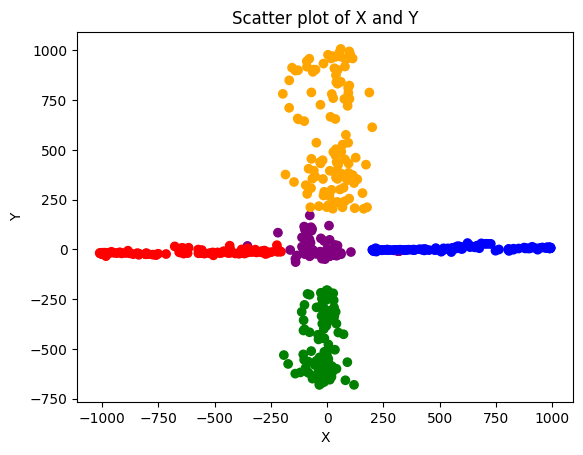

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of X, Y, Z
plt.scatter(shuffled_data['X'], shuffled_data['Y'], c=shuffled_data['label'].map({'left': 'red', 'right': 'blue', 'forward': 'green', 'backward': 'orange', 'stable': 'purple'}))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X and Y')
plt.show()


*italicized text*# **Data Preprocessing for Machine Learning**

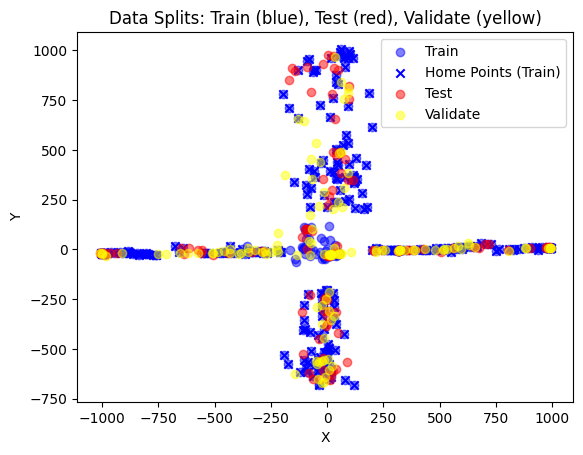

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
shuffled_data = pd.read_csv('shuffled_data.csv')

# Prepare features and labels
X = shuffled_data[['X', 'Y', 'Z']]  # Features
y = shuffled_data['label']  # Target variable

# Encode the labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)  # 60% train
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% val, 20% test

# Check that the splits add up correctly
assert(X_train.shape[0] + X_val.shape[0] + X_test.shape[0]) == X.shape[0], "Sizes do not match!"

# Highlight the home points (left, right, forward, backward) in blue
home_labels = label_encoder.transform(['left', 'right', 'forward', 'backward'])

# Use pd.concat instead of append to merge DataFrames
home_points_train = pd.concat([
    X_train[y_train == home_labels[0]],
    X_train[y_train == home_labels[1]],
    X_train[y_train == home_labels[2]],
    X_train[y_train == home_labels[3]]
])

# Plot the data in each partition in different colors
plt.scatter(X_train['X'], X_train['Y'], c='blue', label='Train', alpha=0.5)
plt.scatter(home_points_train['X'], home_points_train['Y'], c='blue', label='Home Points (Train)', marker='x')

# Plot test data in red and validation data in yellow
plt.scatter(X_test['X'], X_test['Y'], c='red', label='Test', alpha=0.5)
plt.scatter(X_val['X'], X_val['Y'], c='yellow', label='Validate', alpha=0.5)

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Data Splits: Train (blue), Test (red), Validate (yellow)')

plt.show()




## **Example Neural Network Architecture**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Input layer with 3 features (X, Y, Z)
model.add(layers.InputLayer(input_shape=(3,)))

# Hidden layer 1 (e.g., 64 neurons, ReLU activation)
model.add(layers.Dense(64, activation='relu'))

# Hidden layer 2 (optional, can experiment with different numbers of neurons)
model.add(layers.Dense(64, activation='relu'))

# Output layer with as many neurons as there are categories (e.g., 5 categories)
model.add(layers.Dense(5, activation='softmax'))  # Using softmax for multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,741 (18.52 KB)

 Trainable params: 4,741 (18.52 KB)

 Non-trainable params: 0 (0.00 B)

### **Training the Model:(over fitting)  we used 1000 epochs**


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example dataset creation
data = np.random.randn(1000, 3)  # Simulated features (X, Y, Z)
labels = np.random.choice(['left', 'right', 'forward', 'backward', 'diagonal'], size=1000)  # Simulated labels

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(data, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify data shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)


Training data shape: (700, 3) (700,)
Validation data shape: (150, 3) (150,)
Test data shape: (150, 3) (150,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.InputLayer(input_shape=(3,)),  # Input layer for features (X, Y, Z)
    layers.Dense(64, activation='relu'),  # First hidden layer
    layers.Dense(64, activation='relu'),  # Second hidden layer
    layers.Dense(5, activation='softmax')  # Output layer for 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val))

# View training history
print("Training complete.")


Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2068 - loss: 1.6314 - val_accuracy: 0.1733 - val_loss: 1.6234
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2046 - loss: 1.6066 - val_accuracy: 0.1933 - val_loss: 1.6193
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2756 - loss: 1.5884 - val_accuracy: 0.2133 - val_loss: 1.6144
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2847 - loss: 1.5861 - val_accuracy: 0.2667 - val_loss: 1.6154
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2658 - loss: 1.5831 - val_accuracy: 0.2600 - val_loss: 1.6157
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2814 - loss: 1.5808 - val_accuracy: 0.2600 - val_loss: 1.6194
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2760 - loss: 1.5782 - val_accuracy: 0.2533 - val_loss: 1.6190
Epoch 8/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3067 - loss: 1.5689 - val_accuracy: 0

### **Plot Training and Validation Loss**


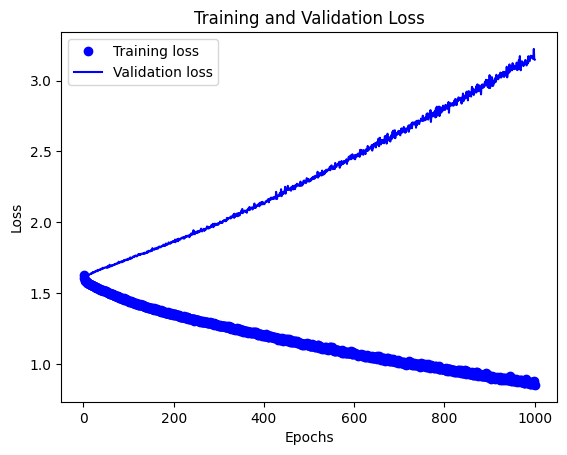

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### **Plot Predictions Against Actual Values**


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


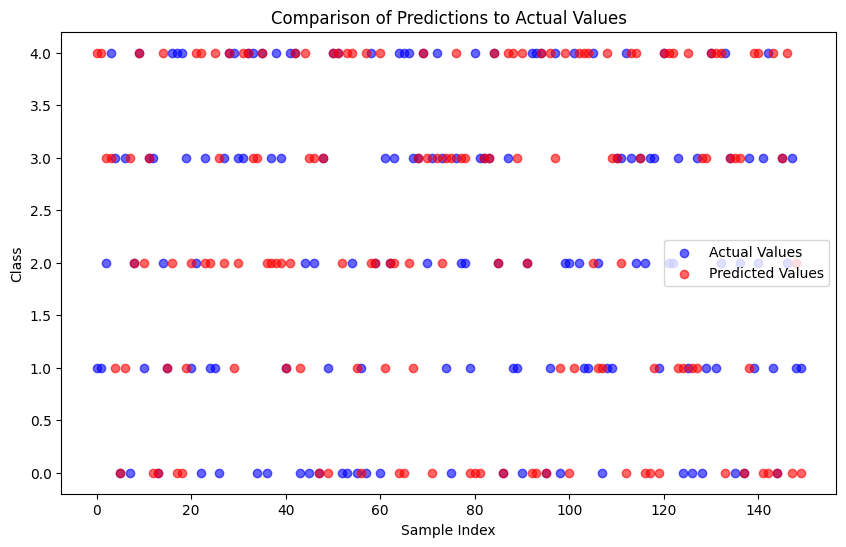

In [ ]:
# Generate predictions on test data
predictions = model.predict(X_test)

# Decode predictions (if they are probabilities) into class indices
predicted_classes = tf.argmax(predictions, axis=1)

# Plot predictions against actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.6)
plt.scatter(range(len(predicted_classes)), predicted_classes, color='red', label='Predicted Values', alpha=0.6)
plt.title("Comparison of Predictions to Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.show()


### **Training the Model:500 epochs**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example dataset creation
data = np.random.randn(1000, 3)  # Simulated features (X, Y, Z)
labels = np.random.choice(['left', 'right', 'forward', 'backward', 'diagonal'], size=1000)  # Simulated labels

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(data, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify data shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)
# Define the model
model = models.Sequential([
    layers.InputLayer(input_shape=(3,)),  # Input layer for features (X, Y, Z)
    layers.Dense(64, activation='relu'),  # First hidden layer
    layers.Dense(64, activation='relu'),  # Second hidden layer
    layers.Dense(5, activation='softmax')  # Output layer for 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

# View training history
print("Training complete.")

Training data shape: (700, 3) (700,)
Validation data shape: (150, 3) (150,)
Test data shape: (150, 3) (150,)
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1865 - loss: 1.6341 - val_accuracy: 0.1933 - val_loss: 1.6154
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2070 - loss: 1.6121 - val_accuracy: 0.1867 - val_loss: 1.6218
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2321 - loss: 1.5984 - val_accuracy: 0.1933 - val_loss: 1.6269
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2528 - loss: 1.5920 - val_accuracy: 0.1667 - val_loss: 1.6307
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2741 - loss: 1.5858 - val_accuracy: 0.1867 - val_loss: 1.6347
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2896 - loss: 1.5864 - val_accuracy: 0.1667 - val_loss: 1.6380
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2554 - loss: 1.5844 - val_accuracy: 0.1933 - val_loss: 1.6365
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2244 - loss: 1.5897 - val_accuracy: 0.1933 - val_loss: 1.

#### **Plot Training and Validation Loss**

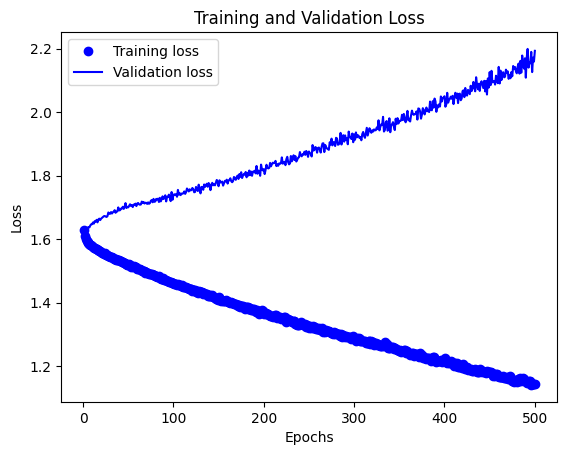

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Training the Model: try number 3**

Training data shape: (700, 3) (700,)
Validation data shape: (150, 3) (150,)
Test data shape: (150, 3) (150,)
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1892 - loss: 2.3536 - val_accuracy: 0.2000 - val_loss: 2.2430
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1702 - loss: 2.2768 - val_accuracy: 0.2133 - val_loss: 2.1552
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1922 - loss: 2.1604 - val_accuracy: 0.2067 - val_loss: 2.0846
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2098 - loss: 2.0735 - val_accuracy: 0.2067 - val_loss: 2.0257
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2417 - loss: 2.0091 - val_accuracy: 0.2267 - val_loss: 1.9752
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2235 - loss: 1.9748 - val_accuracy: 0.2067 - val_loss: 1.9303
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2452 - loss: 1.9208 - val_accuracy: 0.2533 - val_loss: 1.8905
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2139 - loss: 1.8816 - val_accuracy: 0.2400 - val_loss: 1.

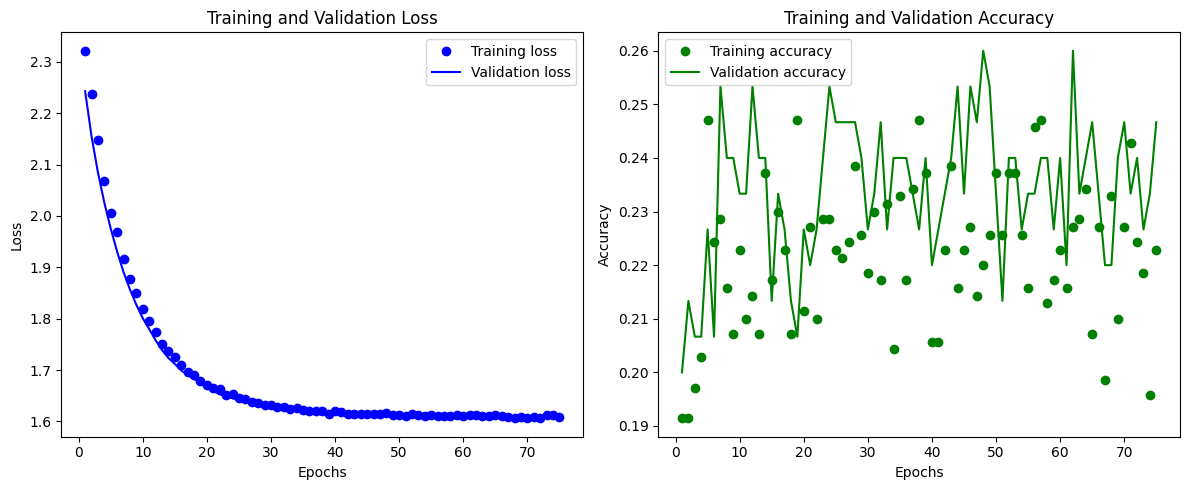

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example dataset creation
data = np.random.randn(1000, 3)  # Simulated features (X, Y, Z)
labels = np.random.choice(['left', 'right', 'forward', 'backward', 'diagonal'], size=1000)  # Simulated labels

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(data, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify data shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

# Define the model with regularization
model = models.Sequential([
    layers.InputLayer(input_shape=(3,)),  # Input layer for features (X, Y, Z)
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.Dropout(0.5),  # Dropout again
    layers.Dense(5, activation='softmax')  # Output layer for 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# View training history
print("Training complete.")

# Plot the training history
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## **Fixed and Improved Code**


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2093 - loss: 3.7011 - val_accuracy: 0.2133 - val_loss: 3.3509
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1856 - loss: 3.2576 - val_accuracy: 0.1800 - val_loss: 2.9837
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2111 - loss: 2.8961 - val_accuracy: 0.1667 - val_loss: 2.6913
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2189 - loss: 2.6209 - val_accuracy: 0.1600 - val_loss: 2.4602
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1922 - loss: 2.3999 - val_accuracy: 0.1467 - val_loss: 2.2749
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2025 - loss: 2.2210 - val_accuracy: 0.1733 - val_loss: 2.1327
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2186 - loss: 2.0866 - val_accuracy: 0.1267 - val_loss: 2.0181
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2178 - loss: 1.9814 - val_accuracy: 0.1600

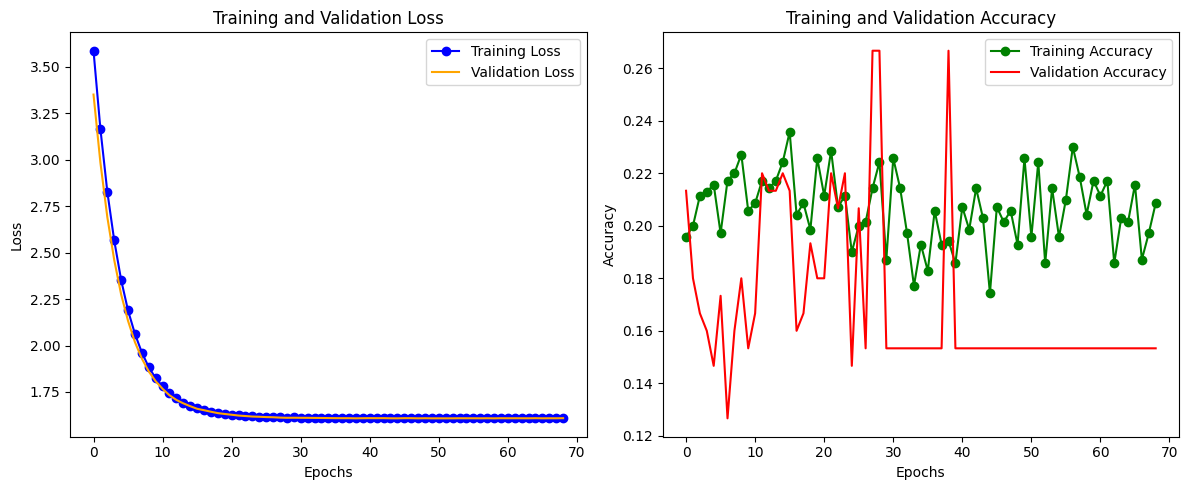

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Step 1: Generate synthetic data
# Simulated dataset with random features and labels
data = np.random.randn(1000, 3)  # Features: X, Y, Z
labels = np.random.choice(['left', 'right', 'forward', 'backward', 'diagonal'], size=1000)

# Step 2: Encode labels into numeric format
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Step 3: Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(data, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Normalize the features (to avoid large values affecting learning)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 5: Define the model with improvements
model = models.Sequential([
    layers.InputLayer(input_shape=(3,)),  # Input layer for 3 features
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Add regularization to prevent overfitting
    layers.Dropout(0.3),  # Dropout to reduce overfitting
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # Output layer for 5 classes
])

# Step 6: Compile the model with a lower learning rate for better optimization
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Add an early stopping mechanism to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 8: Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Train for fewer epochs initially
    batch_size=16,  # Smaller batch size for better learning
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]  # Apply early stopping
)

# Step 9: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 10: Plot training history to assess performance
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# **A New Model Architecture --> we will use DNN**


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers

# Define the model
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),  # Adjust input size based on your features
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(len(set(labels)), activation='softmax')  # Adjust output size based on number of classes
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Use Adam optimizer
    loss='sparse_categorical_crossentropy',          # Use sparse labels if not one-hot encoded
    metrics=['accuracy']
)

# Summary
model.summary()


KeyboardInterrupt: 

## **Training the Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to stop training when validation accuracy stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,             # Set a high number; early stopping will halt training automatically
    batch_size=32,
    callbacks=[early_stopping]
)


In [ ]:
import matplotlib.pyplot as plt

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# **Method SVM multi class**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset
shuffled_data = pd.read_csv('shuffled_data.csv')

# Split features (X, Y, Z) and labels
X = shuffled_data[['X', 'Y', 'Z']]
y = shuffled_data['label']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='rbf', C=1, gamma='scale', decision_function_shape='ovr')  # 'ovr' for multi-class classification
svm.fit(X_train, y_train)

# Evaluate on validation data
y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on test data
y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# (Optional) Visualize decision boundaries (works for 2D datasets only)
# If you want to visualize in 2D, reduce features using PCA or plot specific pairs of features.


Validation Accuracy: 96.67%

Validation Classification Report:
               precision    recall  f1-score   support

    backward       1.00      1.00      1.00        21
     forward       1.00      1.00      1.00        22
        left       1.00      1.00      1.00        28
       right       0.93      0.93      0.93        27
      stable       0.91      0.91      0.91        22

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Test Accuracy: 92.50%

Test Classification Report:
               precision    recall  f1-score   support

    backward       1.00      1.00      1.00        26
     forward       1.00      1.00      1.00        25
        left       1.00      1.00      1.00        22
       right       0.74      0.91      0.82        22
      stable       0.90      0.72      0.80        25

    accuracy                           0.93       120
   macro avg   

## **Code to Visualize Results**

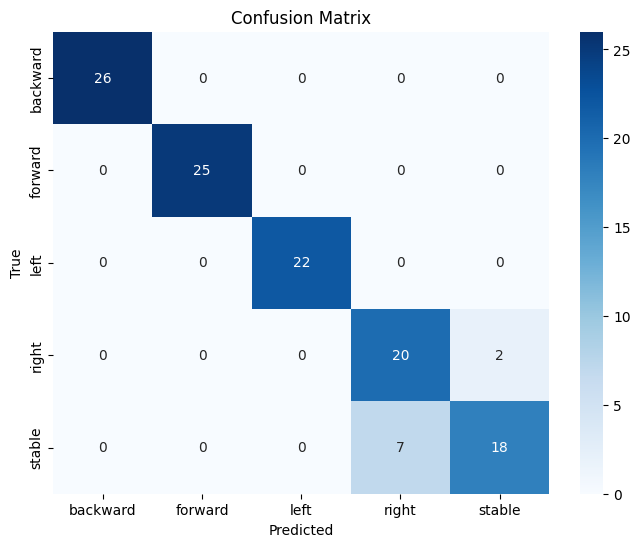

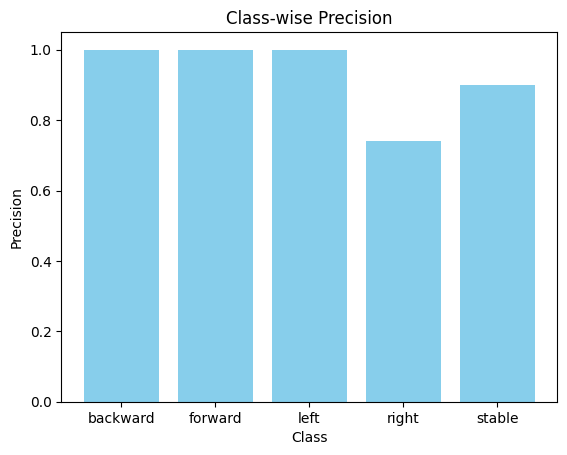

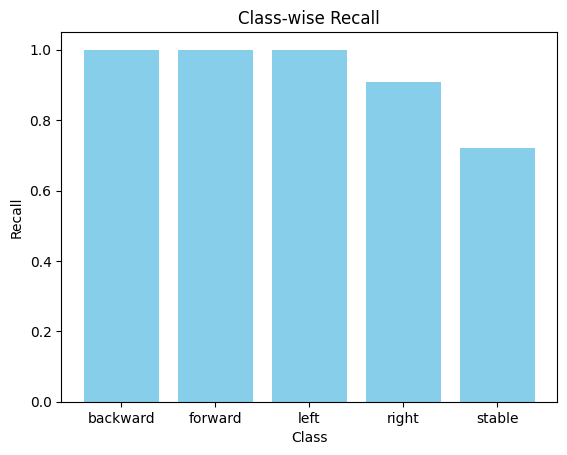

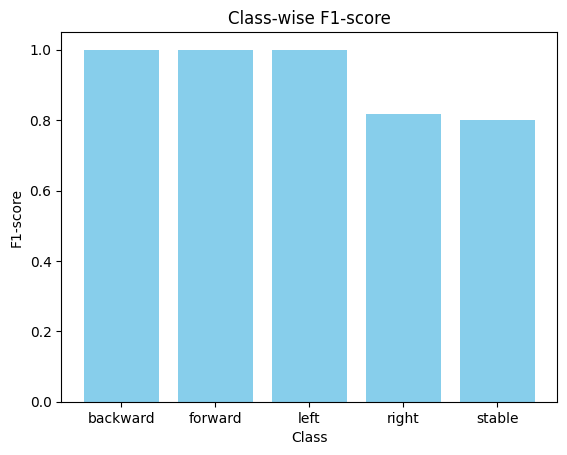

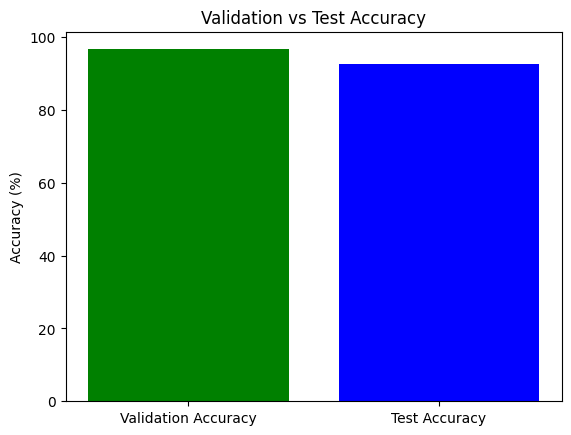

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming y_test and y_test_pred from your SVM results
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
report = classification_report(y_test, y_test_pred, output_dict=True)

# Visualize Class-wise Precision, Recall, and F1-Score
metrics = ["precision", "recall", "f1-score"]
for metric in metrics:
    values = [report[label][metric] for label in np.unique(y_test)]
    plt.bar(np.unique(y_test), values, color='skyblue')
    plt.title(f"Class-wise {metric.capitalize()}")
    plt.xlabel("Class")
    plt.ylabel(metric.capitalize())
    plt.show()

# Accuracy Trends (Validation vs Test)
accuracies = {"Validation Accuracy": val_accuracy * 100, "Test Accuracy": test_accuracy * 100}
plt.bar(accuracies.keys(), accuracies.values(), color=['green', 'blue'])
plt.title("Validation vs Test Accuracy")
plt.ylabel("Accuracy (%)")
plt.show()


# **2nd model try of working with DNN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1301 - loss: 1.6284 - val_accuracy: 0.6583 - val_loss: 1.3816
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6722 - loss: 1.3066 - val_accuracy: 0.7750 - val_loss: 1.1337
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7708 - loss: 1.0914 - val_accuracy: 0.8083 - val_loss: 0.9202
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8066 - loss: 0.8826 - val_accuracy: 0.8250 - val_loss: 0.7356
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8540 - loss: 0.6798 - val_accuracy: 0.9583 - val_loss: 0.5807
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8723 - loss: 0.6035 - val_accuracy: 0.9667 - val_loss: 0.4628
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9345 - loss: 0.4568 - val_accuracy: 0.9667 - val_loss: 0.3748
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9553 - loss: 0.3761 - val_accuracy: 0.958

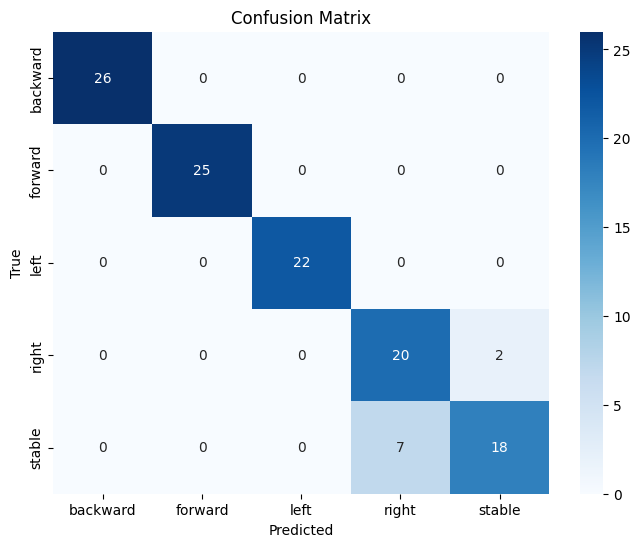

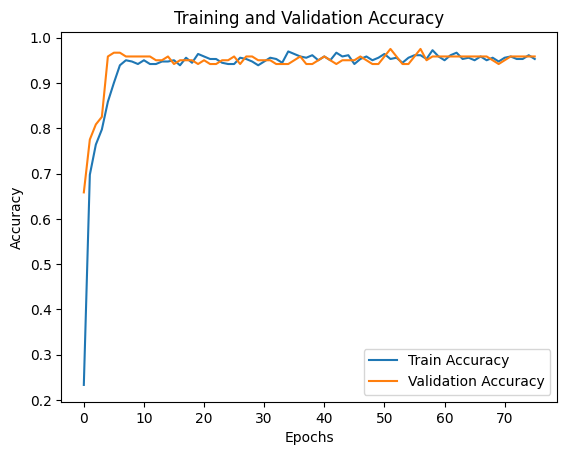

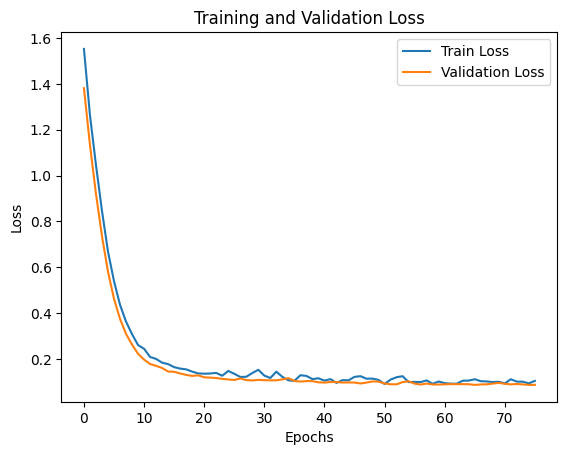

Saved artifact at '/tmp/tmpm5wqoe4q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor_6')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139707643297312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139707643293440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139707643295024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139707643296080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139707643290624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139707643629584: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved as dnn_model.tflite


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'shuffled_data.csv' with the path to your dataset
shuffled_data = pd.read_csv('shuffled_data.csv')

# Split features (X, Y, Z) and labels
X = shuffled_data[['X', 'Y', 'Z']]
y = pd.get_dummies(shuffled_data['label']).values  # One-hot encode labels

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=500,  # Adjust based on performance
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification report
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(shuffled_data['label']),
            yticklabels=np.unique(shuffled_data['label']))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Convert Keras model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # General optimization for size and performance
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_name = 'dnn_model'
with open(f'{tflite_model_name}.tflite', 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved as {tflite_model_name}.tflite")
